# STATE BY HEALTH

It is a machine learning project which predicts state abbreviation by training crude prevalences of medical problems such as high blood pressure, cancer etc among adults aged 18+.

### Data

The dataset used in this project was provided by the Centers for Disease Control and Prevention, Division of Population Health, Epidemiology and Surveillance Branch.

Source: https://chronicdata.cdc.gov/500-Cities/500-Cities-City-level-Data-GIS-Friendly-Format-201/dxpw-cm5u

In [1]:
import pandas as pd

dataset = pd.read_csv("data/dataset.csv")
print("The dataset consists of %d rows and %d cols." % (dataset.shape[0], dataset.shape[1]))

The dataset consists of 500 rows and 10 cols.


In [2]:
dataset.head()

,StateAbbr,BPHIGH_CrudePrev,CANCER_CrudePrev,CHD_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev
0,AL,43.8,5.7,7.7,24.4,16.8,39.2,41.9,46.5,26.1
1,AL,30.7,6.6,5.0,14.1,8.1,35.9,28.6,34.6,9.6
2,AL,36.8,6.6,6.5,19.1,11.5,38.9,33.8,39.2,14.9
3,AL,42.0,6.5,7.7,22.8,13.8,39.9,34.7,41.6,24.3
4,AL,40.3,6.0,6.7,22.0,13.1,37.4,38.9,41.1,21.2


State abbreviations stated in the first column are used as labels in the project while the others are used as features.

Populating the interactive namespace from numpy and matplotlib


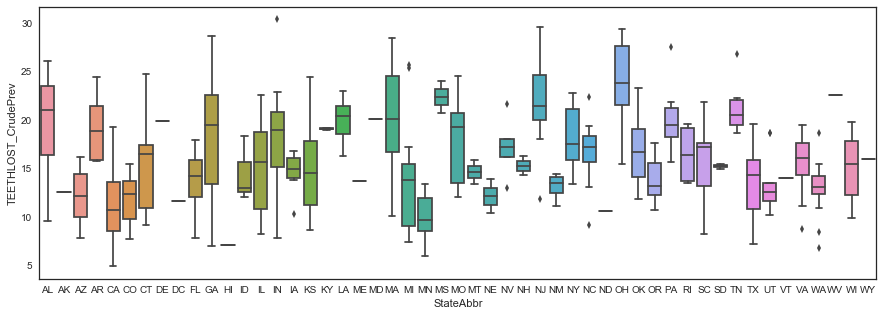

In [3]:
%pylab inline

import seaborn as sns

sns.set(style="white", color_codes=True)

pylab.rcParams["figure.figsize"] = (15, 5)
sns.boxplot(x="StateAbbr", y="TEETHLOST_CrudePrev", data=dataset)

This box-plot shows the distribution of data records for teethlost on states. Thereby, you can see the range and amount of teethlost data for each state separately.

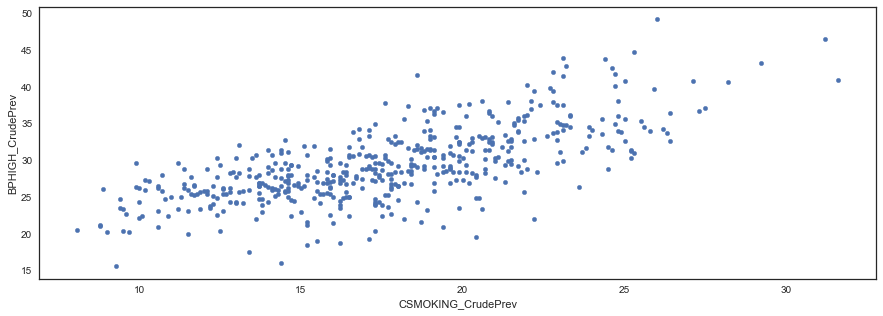

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

pylab.rcParams["figure.figsize"] = (15, 5)
dataset.plot(kind="scatter", x="CSMOKING_CrudePrev", y="BPHIGH_CrudePrev")
plt.show()

This scatter-plot illustrates the relationship between blood pressure and smoking data. It seems like they have a positive correlation.

In order to see the correlation between all features, check the table below.

In [5]:
cols = dataset[["BPHIGH_CrudePrev", "CANCER_CrudePrev", "CHD_CrudePrev", "CSMOKING_CrudePrev", "DIABETES_CrudePrev", "HIGHCHOL_CrudePrev", "OBESITY_CrudePrev", "SLEEP_CrudePrev", "TEETHLOST_CrudePrev"]]
corr = cols.corr()
corr

,BPHIGH_CrudePrev,CANCER_CrudePrev,CHD_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,TEETHLOST_CrudePrev
BPHIGH_CrudePrev,1.000000,0.347332,0.854970,0.698888,0.842355,0.753290,0.744034,0.658592,0.708818
CANCER_CrudePrev,0.347332,1.000000,0.515550,0.058153,0.022720,0.524840,-0.058249,-0.197655,-0.100066
CHD_CrudePrev,0.854970,0.515550,1.000000,0.692472,0.789909,0.829365,0.646578,0.474984,0.678524
CSMOKING_CrudePrev,0.698888,0.058153,0.692472,1.000000,0.600786,0.476549,0.788771,0.583488,0.878214
DIABETES_CrudePrev,0.842355,0.022720,0.789909,0.600786,1.000000,0.673553,0.728049,0.737651,0.726301
HIGHCHOL_CrudePrev,0.753290,0.524840,0.829365,0.476549,0.673553,1.000000,0.591259,0.347989,0.458077
OBESITY_CrudePrev,0.744034,-0.058249,0.646578,0.788771,0.728049,0.591259,1.000000,0.577715,0.806334
SLEEP_CrudePrev,0.658592,-0.197655,0.474984,0.583488,0.737651,0.347989,0.577715,1.000000,0.679876
TEETHLOST_CrudePrev,0.708818,-0.100066,0.678524,0.878214,0.726301,0.458077,0.806334,0.679876,1.000000


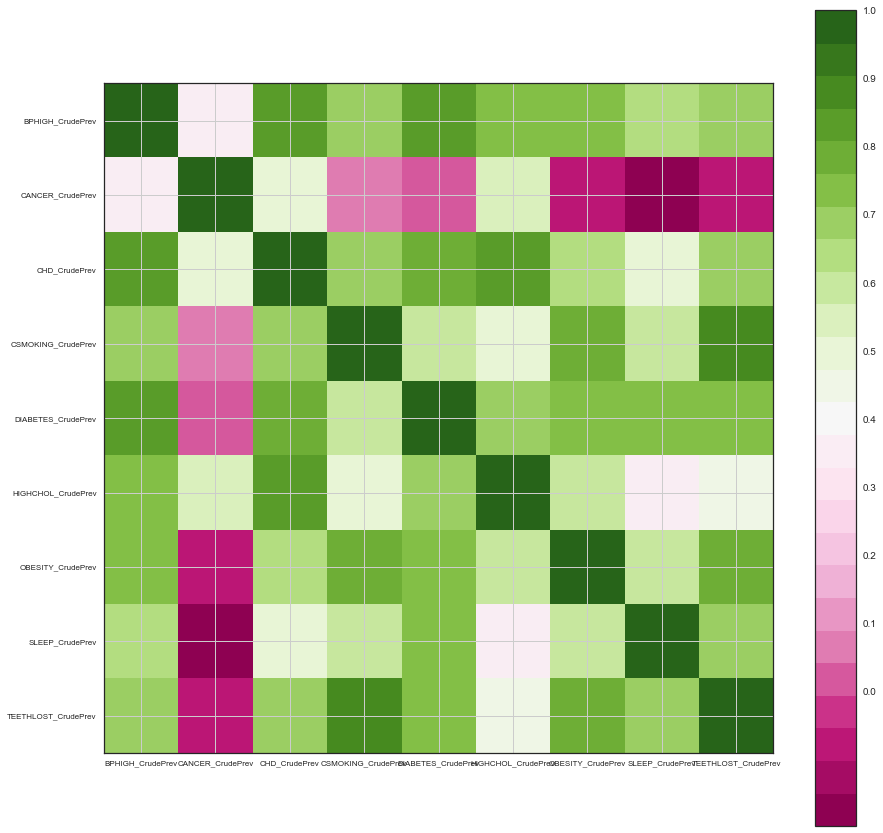

In [6]:
from matplotlib import cm

pylab.rcParams["figure.figsize"] = (15, 15)
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr, interpolation="nearest", cmap=cm.get_cmap("PiYG", 25))
cols = ["", "BPHIGH_CrudePrev", "CANCER_CrudePrev", "CHD_CrudePrev", "CSMOKING_CrudePrev", "DIABETES_CrudePrev", "HIGHCHOL_CrudePrev", "OBESITY_CrudePrev", "SLEEP_CrudePrev", "TEETHLOST_CrudePrev"]
ax1.grid(True)
ax1.set_xticklabels(cols, fontsize=8)
ax1.set_yticklabels(cols, fontsize=8)
fig.colorbar(cax, ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.show()

As is seen, green color indicates positive correlation while purple indicates otherwise. If the color is whitely, then it means that there is a linear correlation. 

For example, blood pressure and coronary heart disease have a strong positive correlation according to the figure above. On the other hand, sleeping problem has a negative correlation with cancer while it is linearly correlated with high cholesterol.

### Preparation

In [5]:
import csv

def csv_to_list():
    data = []
    file = open("data/dataset.csv", "r")
    for row in csv.reader(file):
        data.append(row)
    file.close()
    return data[1:]

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

def split_train_test():
    data = np.array(csv_to_list())
    train, test = train_test_split(data, test_size=0.2)
    return train, test

In [7]:
def split_X_y():
    train, test = split_train_test()
    X_train, y_train, X_test, y_test = [], [], [], []
    for i in train:
        i = i.tolist()
        label = i.pop(0)
        for item in i:
            i[i.index(item)] = float(item)
        X_train.append(i)
        y_train.append(label)
    for i in test:
        i = i.tolist()
        label = i.pop(0)
        for item in i:
            i[i.index(item)] = float(item)
        X_test.append(i)
        y_test.append(label)
    return np.asarray(X_train), np.asarray(y_train), np.asarray(X_test), np.asarray(y_test)

The first 2 methods defined above read the data from csv file and store them in a list in order to allow creating train (80%) and test (20%) sets. Then, the last method splits those sets into X and y by seperating features and labels.  

In [8]:
X_train, y_train, X_test, y_test = split_X_y()

### Classification

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def classifier_1(X, y, i, test_X, test_y):
    svc = SVC(random_state=0)
    svc.fit(X, y)

    prediction = svc.predict([i])[0]
    accuracy = accuracy_score(test_y, svc.predict(test_X))

    return prediction, accuracy

This method contains one classifier that is called SVC. Random state is set to 0. It basically trains the data at first, then predicts a label for given input. Finally, it returns predicted label as well as accuracy calculated through the test set.

In [10]:
from sklearn.linear_model import SGDClassifier

def classifier_2(X, y, i, test_X, test_y):
    sgdc = SGDClassifier(random_state=0, max_iter=20)
    sgdc.fit(X, y)

    prediction = sgdc.predict([i])[0]
    accuracy = accuracy_score(test_y, sgdc.predict(test_X))
    
    return prediction, accuracy

This method contains one classifier that is called SGD. Random state is set to 0 while maximum number of passes over the train set is 20. It basically trains the data at first, then predicts a label for given input. Finally, it returns predicted label as well as accuracy calculated through the test set.

In [11]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier

def classifier_3(X, y, i, test_X, test_y):
    abc = AdaBoostClassifier(random_state=0)
    bc = BaggingClassifier(random_state=0)
    vc = VotingClassifier(estimators=[("abc", abc), ("bc", bc)], voting="hard")
    vc.fit(X, y)

    prediction = vc.predict([i])[0]
    accuracy = accuracy_score(test_y, vc.predict(test_X))
    
    return prediction, accuracy

This method contains an ensemble classifier that is called Voting. Voting type is set to hard. It basically includes 2 separate classifiers that are AdaBoost and Bagging. Each classifier trains the data at first, then predicts a label for given input. Finally, they return predicted labels as well as accuracies calculated through the test set. Then, Voting uses majority vote for selecting the final prediction and accuracy among those returned by AdaBoost and Bagging.

In [12]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

def classifier_4(X, y, i, test_X, test_y):
    etc = ExtraTreesClassifier(random_state=0)
    rfc = RandomForestClassifier(random_state=0)
    vc = VotingClassifier(estimators=[("etc", etc), ("rfc", rfc)], voting="soft")
    vc.fit(X, y)

    prediction = vc.predict([i])[0]
    accuracy = accuracy_score(test_y, vc.predict(test_X))
    
    return prediction, accuracy

This method contains an ensemble classifier that is called Voting. Voting type is set to soft. It basically includes 2 separate classifiers that are ExtraTrees and RandomForest. Each classifier trains the data at first, then predicts a label for given input. Finally, they return predicted labels as well as accuracies calculated through the test set. Then, Voting uses average predicted probabilities for selecting the final prediction and accuracy among those returned by ExtraTrees and RandomForest.

### Prediction

In [15]:
import operator
from statistics import mode
from sklearn.externals import joblib

def main(i):
    prediction_1, accuracy_1 = classifier_1(X_train, y_train, i, X_test, y_test)
    joblib.dump([prediction_1, accuracy_1], "pkl/result_classifier_1.pkl", protocol=2)
    
    prediction_2, accuracy_2 = classifier_2(X_train, y_train, i, X_test, y_test)
    joblib.dump([prediction_2, accuracy_2], "pkl/result_classifier_2.pkl", protocol=2)
    
    prediction_3, accuracy_3 = classifier_3(X_train, y_train, i, X_test, y_test)
    joblib.dump([prediction_3, accuracy_3], "pkl/result_classifier_3.pkl", protocol=2)
    
    prediction_4, accuracy_4 = classifier_4(X_train, y_train, i, X_test, y_test)
    joblib.dump([prediction_4, accuracy_4], "pkl/result_classifier_4.pkl", protocol=2)

    predictions = [prediction_1, prediction_2, prediction_3, prediction_4]
    accuracies = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
    
    results = {}
    
    for i in range(4):
        results[predictions[i]] = accuracies[i] 
    
    try:
        pred = mode(results.keys())
    except:
        pred = max(results.items(), key=operator.itemgetter(1))[0]
    
    accr = results[pred]
    
    return "Prediction:\t%s\nAccuracy:\t%6.4f" % (pred, accr)

This method takes given input and calls all the classifier methods defined above respectively. Thus, it receives predictions and accuracies returned by those classifiers and creates a dictionary by using predicted labels as keys and accuracies as values. Then, it checks the most frequent key. In case all results are unique, it checks which key has the most accurate value instead. Accordingly, it determines the final result.

In [16]:
print(main([44.5, 5.3, 7.2, 24.1, 16.9, 39.7, 41.4, 46.6, 26.3]))

Prediction:	AL
Accuracy:	0.4200
